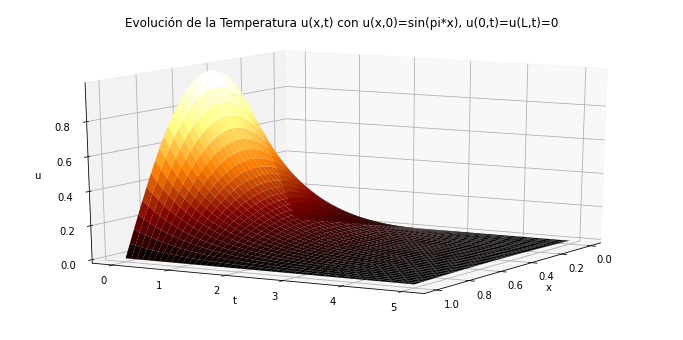

In [2]:
# Solución de la Ecuación del Calor usando scipy.integrate.odeint
# Problema de Valor Inicial y Condiciones a la Frontera Tipo de Dirichlet

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos la expresión de diferencias finitas centradas de segundo orden
def odefunc(u, t):
    # Llenamos de ceros inicialmente
    dudt = np.zeros(x0.shape)

    # Condiciones a la Frontera Tipo Dirichlet: Temperatura constante
    # Condiciones a la frontera u(0,t)=u(L,t)=0 
    dudt[0] = 0
    dudt[-1] = 0 # Equivale a evaluar en el último punto N

    # Constante de difusión del calor
    kappa=0.1
    
    # Calculamos la temperatura en los puntos interiores 1 a N-1.
    for i in range(1, N-1):
        dudt[i] = kappa*(u[i + 1] - 2*u[i] + u[i - 1]) / h**2
    return dudt

# Algunos parámetros
# Intervalo en x = (a,b)
a = 0
b = 1
# Tiempo inicial y final
t0 = 0
tf = 5.0

# Número de puntos en la dirección x
N = 40
# Tamaño de delta x
h = (b-a)/(N-1)

# Contantes de diferencias finitas
#k = 0.25*h**2
#r = k/h**2;

# Los puntos en el dominio x
x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.sin(np.pi*x)
x0[x0 < 0] = 0

# Puntos de integración en el tiempo
tspan = np.linspace(t0, tf, 50);

# Solución usando scipy.integrate.odeint
sol = odeint(odefunc, x0, tspan)

#%% Make a 3d figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
# Ver mapa de colores de Matplotlib
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
ax.plot_surface(SX, ST, sol, cmap='afmhot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=15, azim=30)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=u(L,t)=0')
plt.show()


Caso a)

Una barra metálica de longitud $L=10$, y coeficiente de difusión $\kappa=100$. Condición inicial (Temperatura dentro de la barra): u(x,0) = 0.

Condiciones a la frontera: u(0,t)=10, u(L,t)=0.

Realice los cálculos hasta alcanzar el equilibrio térmico.

In [9]:
def barra(u,t):
  dudt=np.zeros(x0.shape)
  dudt[0]=10
  dudt[-1]=0
  kappa=100

  for i in range(1,N-2):
    dudt[i]=kappa*((u[i + 1] - 2*u[i] + u[i - 1])/(h**2))
    return dudt

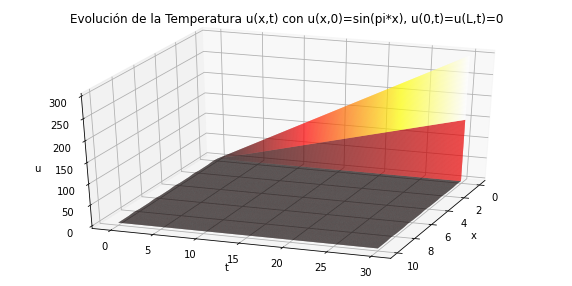

In [10]:
#Intervalo en x(a,b)
a=0
b=10
#Tiempo inicial y tiempo final
t0=0.0
tf=30.0

#Número de puntos en la dirección x
N=400
#Tamaño de delta x
h= (b-a)/(n-1)

x= np.linspace(a, b, N);

x0=np.sin(np.pi*x)
x0[x0 < 0] = 0

tspan = np.linspace(t0, tf, 800);

sol = odeint(barra, x0, tspan)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='hot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=20)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=u(L,t)=0')
plt.show()


Caso b)

Un material de longitud $L=10$ con coeficiente de difusión térmica $\kappa=0.25$

Condición inicial u(x,0)=20.

Condiciones a la frontera: u(0,t)=(20 + 10 sin(pi*t/12), u(L,t)=20.

Realice los cálculos para t=(0,48)

Pueden ajustar los parámetros para ver cómo cambia la temperatura dentro del cuerpo.

Modificando el código anterior para ajustarlo al caso b)

In [15]:
def barra_2(u,t):
  dudt=np.zeros(x0.shape) + 20 
  dudt[0]=20 + 10 * np.sin(np.pi*t/12)
  dudt[-1]=20
  kappa=0.25

  for i in range(1,N-1):
    dudt[i]=kappa*((u[i + 1] - 2*u[i] + u[i - 1])/(h**2))
    return dudt

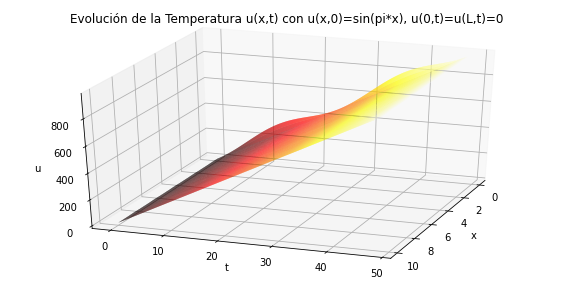

In [16]:
#Intervalo en x(a,b)
a=0
b=10
#Tiempo inicial y tiempo final
t0=0.0
tf=48.0

#Número de puntos en la dirección x
N=400
#Tamaño de delta x
h= (b-a)/(n-1)

x= np.linspace(a, b, N);

x0=np.sin(np.pi*x)
x0[x0 < 0] = 0

tspan = np.linspace(t0, tf, 800);

sol = odeint(barra_2, x0, tspan)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='hot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=20)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=u(L,t)=0')
plt.show()


Diferencias finitas

Caso a)

dt/dx**2 0.0019056693663649356


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'lw'


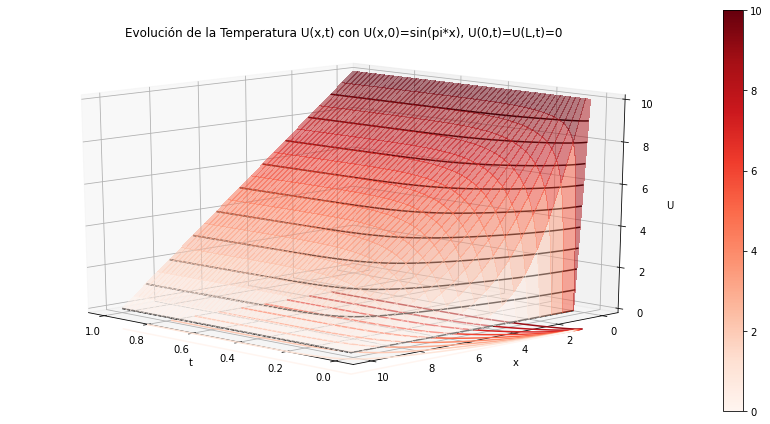

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
  
#Pasos en x y en t
m=21
n=2100

#Condiciones de la barra
x0=0
xL=10

#Tiempos de integracion
t0=0
tf=1.0

#tamaño de paso
dx= (xL-x0)/(m-1)
dt= (tf-t0)/(n-1)
print('dt/dx**2', dt/dx**2)
#difusion termica
kappa=100

alpha=(kappa*dt)/(dx**2)
xspan= np.linspace(x0, xL, m)
tspan= np.linspace(t0, tf, n)

U = np.zeros((m, n))

U[:,0]= np.zeros(xspan.shape)
U[0, :] = 10
U[-1, :] = 0.0

for k in range(0,n-1):
  for i in range(1, m-1):
    U[i, k+1]=alpha*U[i-1, k] + (1-2*alpha)*U[i,k]+alpha*U[i+1, k]

T, X = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(12,6))
# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=sin(pi*x), U(0,t)=U(L,t)=0')

# Punto del observador 
ax.view_init(elev=15, azim=135)

plt.tight_layout()
plt.show()




Caso b)

dt/dx**2 0.09147212958551691


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'lw'


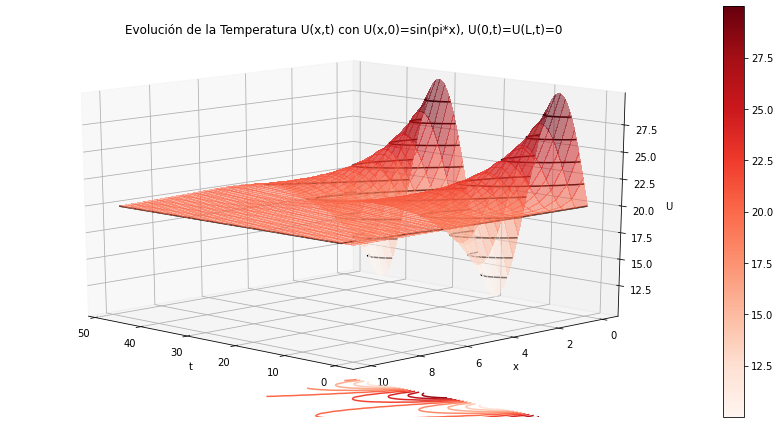

In [39]:
#Pasos en x y en t
m=21
n=2100

#Condiciones de la barra
x0=0
xL=10

#Tiempos de integracion
t0=0
tf=48.0

#tamaño de paso
dx= (xL-x0)/(m-1)
dt= (tf-t0)/(n-1)
print('dt/dx**2', dt/dx**2)
#difusion termica
kappa=0.25

alpha=(kappa*dt)/(dx**2)
xspan= np.linspace(x0, xL, m)
tspan= np.linspace(t0, tf, n)

U = np.zeros((m, n))

U[:,0]= np.zeros(xspan.shape)+20
U[0, :] = 20 + 10*np.sin(np.pi*tspan/12)
U[-1, :] = 20.0

for k in range(0,n-1):
  for i in range(1, m-1):
    U[i, k+1]=alpha*U[i-1, k] + (1-2*alpha)*U[i,k]+alpha*U[i+1, k]

T, X = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(12,6))
# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=sin(pi*x), U(0,t)=U(L,t)=0')

# Punto del observador 
ax.view_init(elev=15, azim=135)

plt.tight_layout()
plt.show()


dt/dx**2 < 0.5? 0.4000800160032006


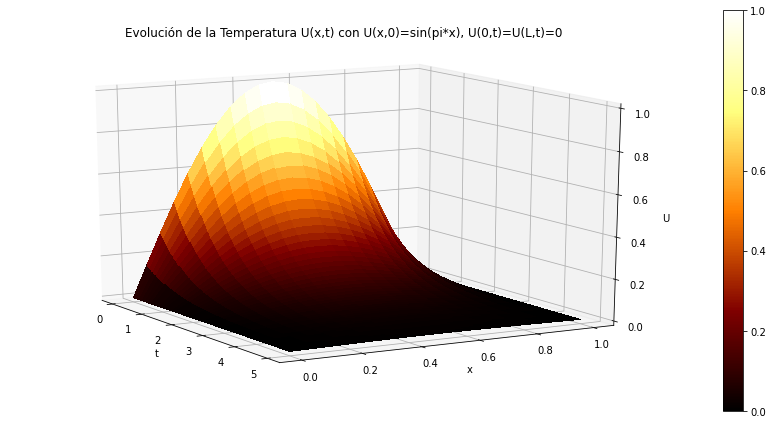

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
  

# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 5000 # Número de puntos en el tiempo

x0 = 0
xL = 1 # Longitud de la barra

t0 = 0
tF = 5.0 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 0.1 # difusividad térmica
alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
U[:, 0] = np.sin(np.pi*xspan)
#U[:,0] = np.zeros(xspan.shape)
# Condiciones a la Frontera tipo Dirichlet
U[0, :] = 0
U[-1, :] = 0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='afmhot',
                       linewidth=0.01, antialiased=False)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='afmhot')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=sin(pi*x), U(0,t)=U(L,t)=0')

# Punto del observador 
ax.view_init(elev=15, azim=-30)

plt.tight_layout()
plt.show()


Problema 2:

Variaciones de la Temperatura en el Suelo

La superficie de la Tierra recibe radiación solar durante el día. Esta Energía la transforma en calor, y cambia la temperatura dentro del suelo. Por la noche al no recibir radiación solar la emite a la atmósfera.

Si suponemos que la temperatura del suelo varía con la profundidad, podemos suponer que tenemos un problema unidimensional, siendo el eje x la dirección hacia dentro del suelo.

A cierta profundidad x=L, suponemos que la temperatura ya no cambia, es decir ∂u/∂x=0 (Condición de Neumann).

Supondremos que la variación de la temperatura en la superficie terrestre varía como

u(0,t)=u0+uasin(2πtP)
donde u0 es la inical temperatura promedio del suelo y ua es la temperatura del aire. La constante P es el periodo de variación diaria de temperatura P=24h=86,400s.

En este caso la constante de difusión de calor es κ=1.0×10−6. El tiempo será medido en segundos.

Usando la Ecuación de Calor, determina numéricamente la variación del perfil de temperatura dentro del suelo, por ejemplo para Hermosillo en estos días supongamos que u0=15ºC, ua=20ºC.

Realiza una simulación de al menos 48 horas.

dt/dx**2 343.02048594568845


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: The following kwargs were not used by contour: 'lw'


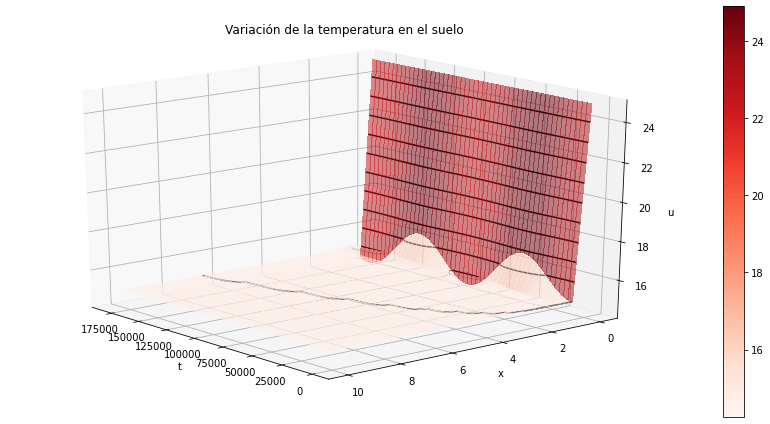

In [42]:
#Pasos en x y en t
m=21
n=2100

#Condiciones de la barra
x0=0
xL=10

#De 50 horas
#Tiempos de integracion
t0=0
tf=180000 #en segundos

#tamaño de paso
dx= (xL-x0)/(m-1)
dt= (tf-t0)/(n-1)
print('dt/dx**2', dt/dx**2)
#Difusividad térmica
#La constante de difusión de calor es κ=1.0×10−6
kappa= 1*10**(-6)

alpha=(kappa*dt)/(dx**2)
xspan= np.linspace(x0, xL, m)
tspan= np.linspace(t0, tf, n)

U = np.zeros((m, n))

U[:,0]= 15.0*np.ones(xspan.shape)
#U[0, :] = 20 + 10*np.sin(np.pi*tspan/12)
#U[-1, :] = 20.0

for k in range(0,n-1):
  t=k*dt
  U[0, :] = 15 + 20*np.sin(2*np.pi*t/86400)
  U[-1, :] = 15
  for i in range(1, m-1):
    U[i, k+1]=alpha*U[i-1, k] + (1-2*alpha)*U[i,k]+alpha*U[i+1, k]

T, X = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(12,6))
ax=fig.gca(projection='3d')
surf = ax.plot_surface(T,X,U, cmap='Reds', linewidth=0.01, antialiased=False, alpha=0.5)

ax.contour(T, X, U, 10,lw=1, colors='k',linestyles='solid')
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles='solid', offset=-1)

m = cm.ScalarMappable(cmap='Reds')

m.set_array(U)
plt.colorbar(m)

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
ax.set_title('Variación de la temperatura en el suelo')

ax.view_init(elev=20, azim=140)

plt.tight_layout()
plt.show()


Soluciones del jupiter notebook

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: UserWarning: The following kwargs were not used by contour: 'lw'


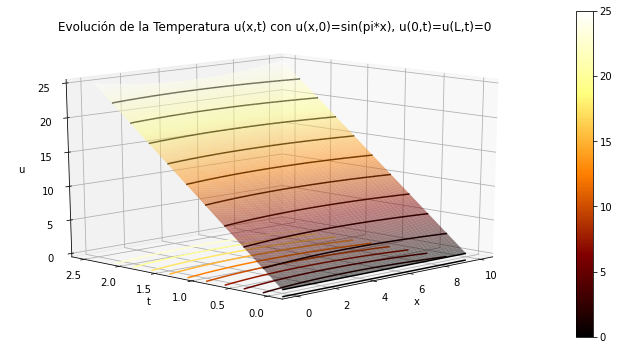

In [3]:
# Ejercicio 1a)
# Solución de la Ecuación del Calor usando scipy.integrate.odeint
# Problema de Valor Inicial y Condiciones a la Frontera Tipo de Dirichlet

import numpy as np
from scipy.integrate import odeint, solve_ivp, solve_bvp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Definimos la expresión de diferencias finitas centradas de segundo orden
def odefunc(u, t):
    # Llenamos de ceros inicialmente
    dudt = np.zeros(x.shape)

    # Condiciones a la Frontera Tipo Dirichlet: Temperatura constante
    # Valor de Entrada necesario
    # u[0] = 10.0
    # Condiciones a la frontera u(0,t)=u(L,t)=0 
    dudt[0] = 10.0
    dudt[-1] = 10.0 # Equivale a evaluar en el último punto N
    #u[0] = dudt[0]
    # Constante de difusión del calor
    kappa=100.0
    
    # Calculamos la temperatura en los puntos interiores 1 a N-1.
    for i in range(1, N-1):
          dudt[i] = kappa*(u[i + 1] - 2*u[i] + u[i - 1]) / h**2
    return dudt

def bc(ua, ub):
    return np.array([u[0], u[-1]])
    # Algunos parámetros
# Intervalo en x = (a,b)
a = 0
b = 10
# Tiempo inicial y final
t0 = 0
tf = 2.5

# Número de puntos en la dirección x
N = 51
# Número de pasos de integración en t
Ntstep = 100
# Tamaño de delta x
h = (b-a)/(N-1)

# Contantes de diferencias finitas
#k = 0.25*h**2
#r = k/h**2;

# Los puntos en el dominio x
x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.zeros(x.shape)

#x0[x0 < 0] = 0

# Puntos de integración en el tiempo
tspan = np.linspace(t0, tf, Ntstep);

# Solución usando scipy.integrate.odeint
sol = odeint(odefunc, x0, tspan)
#sol = solve_ivp(odefunc, (t0,tf), y0=x0, method='RK45', t_eval=tspan)
#sol = solve_bvp(odefunc, bc, x0, tspan)

#%% Make a 3d figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x,tspan)
# Ver mapa de colores de Matplotlib
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
ax.plot_surface(SX, ST, sol, cmap='afmhot', rstride=1, cstride=1, alpha=0.5)

# Contornos
ax.contour(SX, ST, sol, 10, lw=1, colors="k", linestyles="solid")
ax.contour(SX, ST, sol, 10, lw=1, cmap="afmhot", linestyles="solid", offset=-1)


# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='afmhot')
m.set_array(sol)
plt.colorbar(m)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=15, azim=-135)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=u(L,t)=0')
plt.show()

In [4]:
sol.shape

(100, 51)

In [5]:
odefunc(x0,0).shape

(51,)

dt/dx**2 < 0.5? 0.002


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: The following kwargs were not used by contour: 'lw'


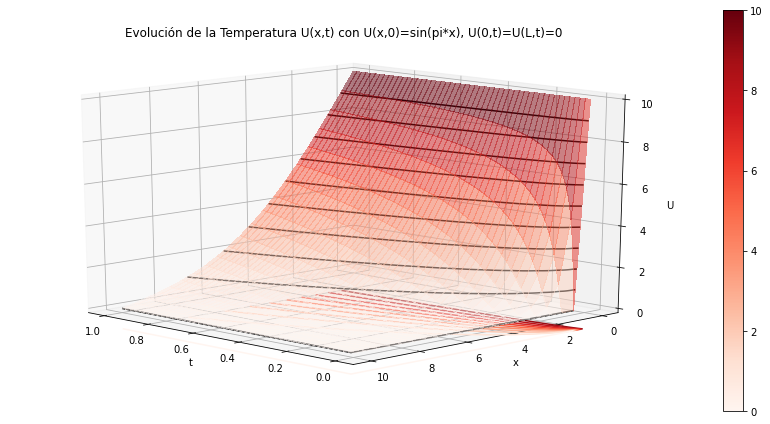

In [6]:
# Usando código de diferencias finitas para resolver Ejercicio 1a)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
  

# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 2001 # Número de puntos en el tiempo

x0 = 0
xL = 10 # Longitud de la barra

t0 = 0
tF = 1.0 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 10.0 # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
#U[:, 0] = np.sin(np.pi*xspan)
U[:,0] = np.zeros(xspan.shape)
# Condiciones a la Frontera tipo Dirichlet
U[0, :] = 10
U[-1, :] = 0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)
# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=sin(pi*x), U(0,t)=U(L,t)=0')

# Punto del observador 
ax.view_init(elev=15, azim=135)

plt.tight_layout()
plt.show()

dt/dx**2 < 0.5? 0.0256


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: UserWarning: The following kwargs were not used by contour: 'lw'


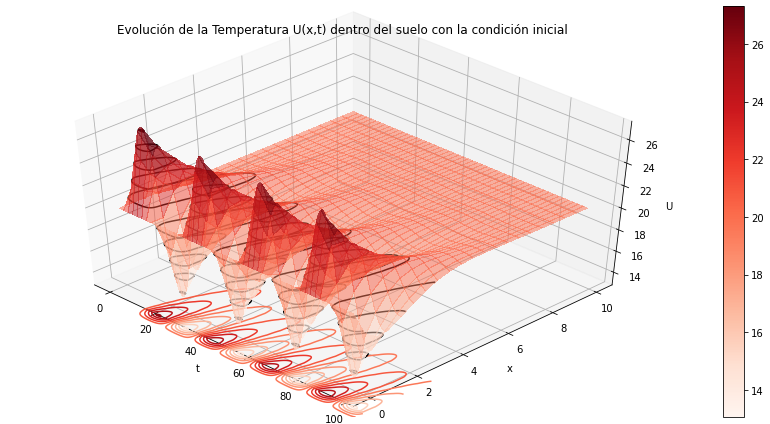

In [7]:
# Solución de 1b)
# Variaciones de la Temperatura dentro del suelo
# Usando código de diferencias finitas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
  

# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 15001 # Número de puntos en el tiempo

x0 = 0
xL = 10 # Longitud de la barra

t0 = 0
tF = 96 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 0.25 # difusividad térmica
alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
#U[:, 0] = np.sin(np.pi*xspan)
# La temperatura inicial es de 20ºC dentro de la tierra
U[:,0] = 20.0*np.ones(xspan.shape)

# Condiciones a la Frontera tipo Dirichlet
#U[0, :] = 20 + 10*np.sin(np.pi*t/12.0)
#U[-1, :] = 20.0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    # Condiciones a la frontera (varía con el tiempo) 
    t=k*dt
    U[0, :] = 20 + 10*np.sin(np.pi*t/12.0)
    U[-1, :] = 20.0
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)
# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=10)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) dentro del suelo con la condición inicial ')

# Punto del observador 
ax.view_init(elev=45, azim=-45)
plt.tight_layout()
plt.show()